## Q&A Activity Question Week - 10

In [1]:
#Submitted by Group 12 (DSA_B3)

Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10. Do the standard scaling on the feature performance score.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [3]:
df = pd.read_csv(r'employee.csv')

In [4]:
df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [5]:
df.tail()

,name,age,income,gender,department,grade,performance_score
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [6]:
df.shape

(9, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [8]:
df.isnull().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [9]:
df.describe(include='all')

,name,age,income,gender,department,grade,performance_score
count,9,7.000000,7.000000,7,9,9,9.000000
unique,9,NaN,NaN,2,3,4,NaN
top,Josh Wills,NaN,NaN,F,Finance,G3,NaN
freq,1,NaN,NaN,5,3,5,NaN
mean,NaN,40.428571,52857.142857,NaN,NaN,NaN,610.666667
std,NaN,12.204605,26028.372797,NaN,NaN,NaN,235.671912
min,NaN,23.000000,16000.000000,NaN,NaN,NaN,53.000000
25%,NaN,31.000000,38500.000000,NaN,NaN,NaN,556.000000
50%,NaN,45.000000,52000.000000,NaN,NaN,NaN,674.000000
75%,NaN,49.500000,63500.000000,NaN,NaN,NaN,711.000000


### 2. Reset the index as "name" as the index.

In [10]:
df.set_index('name',inplace=True)

In [11]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3. Select rows for specific names Jack Morgan and Josh wills.


In [12]:
df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.

In [13]:
df['department'].unique()

array(['Operations', 'Finance', 'Sales'], dtype=object)

In [14]:
df['department'].value_counts()

Finance       3
Operations    3
Sales         3
Name: department, dtype: int64

In [15]:
df[(df['department']=='Finance') | (df['department']=='Sales') ]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [16]:
#Alternative Method 
sf = df[df['department'].isin(['Finance', 'Sales'])]
sf

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score.

In [17]:
df[df['performance_score']>700]  #masking to get the required employees  

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6. Display employee who has more than 500 and less than 700 performance score

In [18]:
df[(df['performance_score']>500) & (df['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### 7. Check and handle missing values in the dataset

In [19]:
df.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

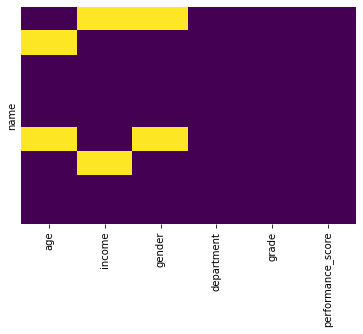

In [20]:
#heatmap for nulls
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [21]:
df[['age','income','gender']]

,age,income,gender
name,,,
Allen Smith,45.0,NaN,NaN
S Kumar,NaN,16000.0,F
Jack Morgan,32.0,35000.0,M
Ying Chin,45.0,65000.0,F
Dheeraj Patel,30.0,42000.0,F
Satyam Sharma,NaN,62000.0,NaN
James Authur,54.0,NaN,F
Josh Wills,54.0,52000.0,F
Leo Duck,23.0,98000.0,M


#### Handling Missing Values of Age

In [22]:
df[df['age'].isnull()]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


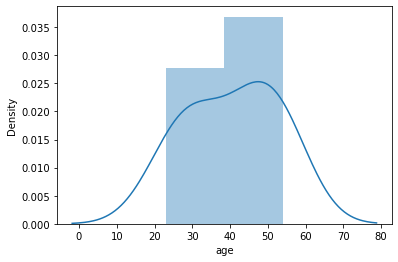

In [23]:
sns.distplot(df['age'],kde=True)

* Age is found to be almost normally distributed.
* We can impute the missing values using mean in this case.
* For higher accuracy, we can also fill Missing female ages with mean of female ages and Missing male ages with mean of male ages.

In [24]:
med = df['age'].median()
mean = df['age'].mean()
print('median age is',med)
print('mean age is',mean)

median age is 45.0
mean age is 40.42857142857143


In [25]:
df['age'].mean()

40.42857142857143

In [26]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [27]:
df['age']

name
Allen Smith      45.000000
S Kumar          40.428571
Jack Morgan      32.000000
Ying Chin        45.000000
Dheeraj Patel    30.000000
Satyam Sharma    40.428571
James Authur     54.000000
Josh Wills       54.000000
Leo Duck         23.000000
Name: age, dtype: float64

In [28]:
df[df['age'].isnull()]

,age,income,gender,department,grade,performance_score
name,,,,,,


#### Handling Missing Values of Income

In [29]:
df[df['income'].isnull()]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
James Authur,54.0,NaN,F,Operations,G3,53


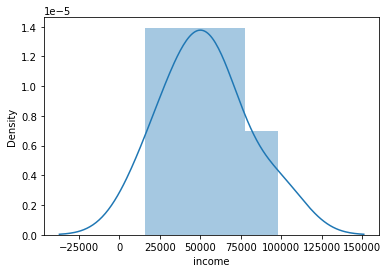

In [30]:
sns.distplot(df['income'],kde=True)

In [31]:
df['income']

name
Allen Smith          NaN
S Kumar          16000.0
Jack Morgan      35000.0
Ying Chin        65000.0
Dheeraj Patel    42000.0
Satyam Sharma    62000.0
James Authur         NaN
Josh Wills       52000.0
Leo Duck         98000.0
Name: income, dtype: float64

* There are a few extreme values in case of Income (which is logical).
* Even though the distribution is normal, we prefer to impute the missing values using Median.

In [32]:
df['income'].median()

52000.0

In [33]:
df['income'].fillna(df['income'].median(),inplace=True)

In [34]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,NaN,Operations,G3,723
S Kumar,40.428571,16000.0,F,Finance,G0,520
Jack Morgan,32.000000,35000.0,M,Finance,G2,674
Ying Chin,45.000000,65000.0,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711
Satyam Sharma,40.428571,62000.0,NaN,Sales,G3,649
James Authur,54.000000,52000.0,F,Operations,G3,53
Josh Wills,54.000000,52000.0,F,Finance,G3,901
Leo Duck,23.000000,98000.0,M,Sales,G4,709


In [35]:
df[df['income'].isnull()]

,age,income,gender,department,grade,performance_score
name,,,,,,


#### Handling Missing Values of Gender

In [36]:
df[df['gender'].isnull()]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,NaN,Operations,G3,723
Satyam Sharma,40.428571,62000.0,NaN,Sales,G3,649


* We can impute the missing values using Mode 

In [37]:
df['gender'].mode()

0    F
dtype: object

In [38]:
df['gender'].mode()[0]

'F'

In [39]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

In [40]:
df['gender']

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
James Authur     F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [41]:
df[df['gender'].isnull()]

,age,income,gender,department,grade,performance_score
name,,,,,,


* All Missing Values has been handled.

### 8. Check the outliers and handle outliers in performance score using Percentiles.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9 non-null      float64
 1   income             9 non-null      float64
 2   gender             9 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 824.0+ bytes


In [43]:
df.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

* From the columns in the dataset, we have to the following relevant numerical columns for outliers:
    1. Age
    2. Income
    3. Performance Score
    

* Here we are only handling outliers for the 'Performance Score' column.

In [44]:
df['performance_score'].to_frame()

,performance_score
name,
Allen Smith,723
S Kumar,520
Jack Morgan,674
Ying Chin,556
Dheeraj Patel,711
Satyam Sharma,649
James Authur,53
Josh Wills,901
Leo Duck,709


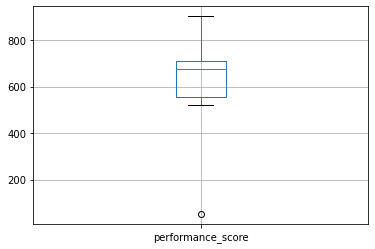

In [45]:
df.boxplot(column='performance_score')

* We see a lower outlier in the column.

In [46]:
#np.percentile can also be used instead of quantiles 

Q1_Perf = df['performance_score'].quantile(0.25)
Q3_Perf = df['performance_score'].quantile(0.75)
IQR_Perf = Q3_Perf - Q1_Perf
print("The Inter-Quartile Range for Performance Score is",IQR_Perf)

The Inter-Quartile Range for Performance Score is 155.0


In [47]:
low_lim_Perf = Q1_Perf - 1.5 * IQR_Perf
upp_lim_Perf = Q3_Perf + 1.5 * IQR_Perf
print("Lower limit for Performance Score is", low_lim_Perf)
print("Upper limit for Performance Score is", upp_lim_Perf)
print("Beyond upper and lower limits, the values are classified as Outliers.") 

Lower limit for Performance Score is 323.5
Upper limit for Performance Score is 943.5
Beyond upper and lower limits, the values are classified as Outliers.


In [48]:
#catching outliers from the column
outlier_Perf= df[(df['performance_score'] < Q1_Perf - 1.5*IQR_Perf) | (df['performance_score'] > Q3_Perf + 1.5*IQR_Perf)]

In [49]:
outlier_Perf

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52000.0,F,Operations,G3,53


* James Authur is identified as the lower outlier with a low performance score of 53.

In [50]:
outlier_Perf.index

Index(['James Authur'], dtype='object', name='name')

In [51]:
df = df.drop('James Authur')

In [52]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,F,Operations,G3,723
S Kumar,40.428571,16000.0,F,Finance,G0,520
Jack Morgan,32.000000,35000.0,M,Finance,G2,674
Ying Chin,45.000000,65000.0,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711
Satyam Sharma,40.428571,62000.0,F,Sales,G3,649
Josh Wills,54.000000,52000.0,F,Finance,G3,901
Leo Duck,23.000000,98000.0,M,Sales,G4,709


### 9. Check the gender column and do Dummy encoding.


In [53]:
df['gender']

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [54]:
df['gender'] = pd.get_dummies(df['gender'])

In [55]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,1,Operations,G3,723
S Kumar,40.428571,16000.0,1,Finance,G0,520
Jack Morgan,32.000000,35000.0,0,Finance,G2,674
Ying Chin,45.000000,65000.0,1,Sales,G3,556
Dheeraj Patel,30.000000,42000.0,1,Operations,G2,711
Satyam Sharma,40.428571,62000.0,1,Sales,G3,649
Josh Wills,54.000000,52000.0,1,Finance,G3,901
Leo Duck,23.000000,98000.0,0,Sales,G4,709


* Females are represented with 1 and Males are represented with 0 in the Dummy Encoding.

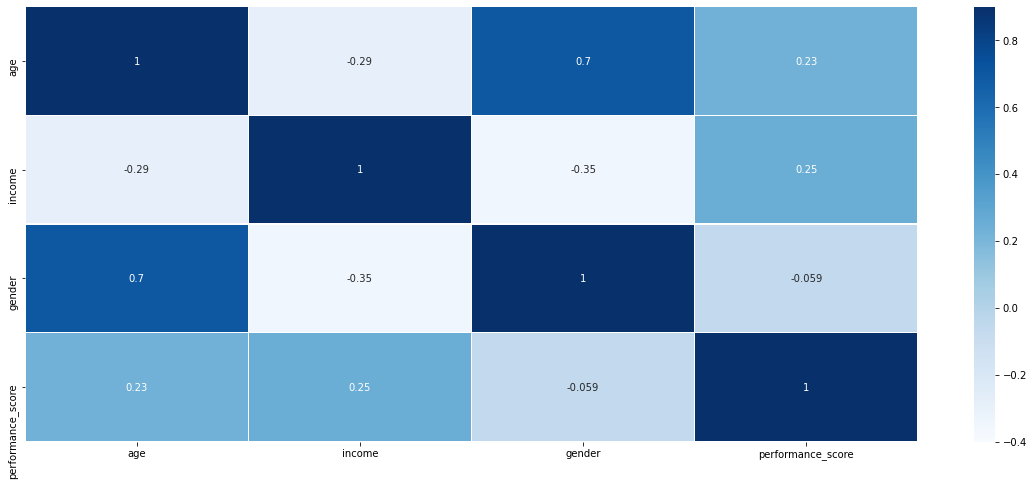

In [56]:
corrmatrix = df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=0.9, annot=True, linewidth=0.2, cmap='Blues')

### 10.Do the standard scaling on the feature performance score.

In [57]:
df['performance_score']

name
Allen Smith      723
S Kumar          520
Jack Morgan      674
Ying Chin        556
Dheeraj Patel    711
Satyam Sharma    649
Josh Wills       901
Leo Duck         709
Name: performance_score, dtype: int64

In [58]:
df['performance_score'].describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

In [59]:
#importing the StdScaler
from sklearn.preprocessing import StandardScaler

In [60]:
#Create a StdScaler object
scaler = StandardScaler()

In [61]:
perf_df = pd.DataFrame(df['performance_score'])

In [62]:
perf_df

,performance_score
name,
Allen Smith,723
S Kumar,520
Jack Morgan,674
Ying Chin,556
Dheeraj Patel,711
Satyam Sharma,649
Josh Wills,901
Leo Duck,709


In [63]:
scaled = scaler.fit_transform(perf_df)
print(scaled)

[[ 0.39226224]
 [-1.47587231]
 [-0.05866679]
 [-1.14457751]
 [ 0.28183064]
 [-0.28873262]
 [ 2.03033096]
 [ 0.26342538]]


In [64]:
df_new  = pd.DataFrame(scaled)

In [65]:
df_new

,0
0,0.392262
1,-1.475872
2,-0.058667
3,-1.144578
4,0.281831
5,-0.288733
6,2.030331
7,0.263425


In [66]:
#checking the summary stats
df_new.describe()

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00


In [67]:
#Submitted by - DSA_B3_Group12
#Members: Shiffa Saleem, Akshaya V, Navaneeth R, Sidharth S, Sujith Narayanan